In [1]:
from markitdown import MarkItDown

In [2]:
"""md = MarkItDown()
result = md.convert("Developmental biology.pdf")
print(result.text_content[:1000])
text = result.text_content"""

with open('./Develpmental_biology.md', 'r', ) as f:
    text = f.read()
text[:100]

'发育生物学（原书第11版）\n\nDevelopmental Biology (Eleventh Edition)\n\n〔芬〕S.F.吉尔伯特    〔美〕M.J.F.巴雷西编著\n石德利 等  译\n\n\x0c生命'

# wordcloud词云图

In [9]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

/home/liuchangle/miniconda3/envs/biopython/lib/python3.10/site-packages/wordcloud/wordcloud.py:35: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/liuchangle/miniconda3/envs/biopython/lib/python3.10/site-packages/wordcloud/stopwords' mode='r' encoding='UTF-8'>
  STOPWORDS = set(map(str.strip, open(os.path.join(FILE, 'stopwords')).readlines()))


In [10]:
# plt.rcParams['font.family'] = 'Noto Sans CJK JP'
# plt.rcParams['font.family'] = 'SimHei'
# 为matplotlib设置中文字体路径没用, 为wordcloud设置中文字体
font_path = "/home/liuchangle/.fonts/SimHei.ttf"  

# 查看系matplotlib中所有的字体
# a=sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])

In [6]:
# Create a word cloud
word_Cloud = WordCloud(
    width=800,
    height=400,
    background_color='black',
    max_words=150,
    colormap='coolwarm',
    font_path=font_path
).generate(text)

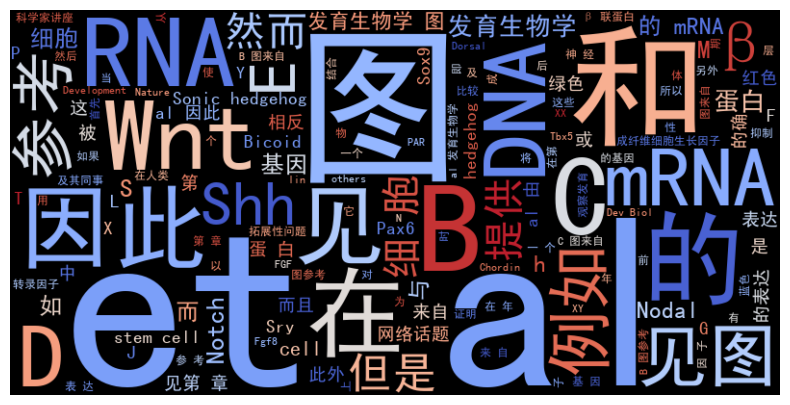

In [7]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(word_Cloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

In [8]:
def quick_plot(text, font_path, custom_stopwords=None):
    
    # Create a word cloud
    word_Cloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        max_words=150,
        colormap='coolwarm',
        font_path=font_path,
        stopwords=custom_stopwords
    ).generate(text)

    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(word_Cloud, interpolation='bilinear')
    plt.axis('off')  # Hide the axes
    plt.show()


/tmp/ipykernel_386834/4285199138.py:9: ResourceWarning: unclosed file <_io.TextIOWrapper name='stopwords_cn.txt' mode='r' encoding='UTF-8'>
  STOPWORDS_FILE = set(map(str.strip, open(FILE).readlines()))


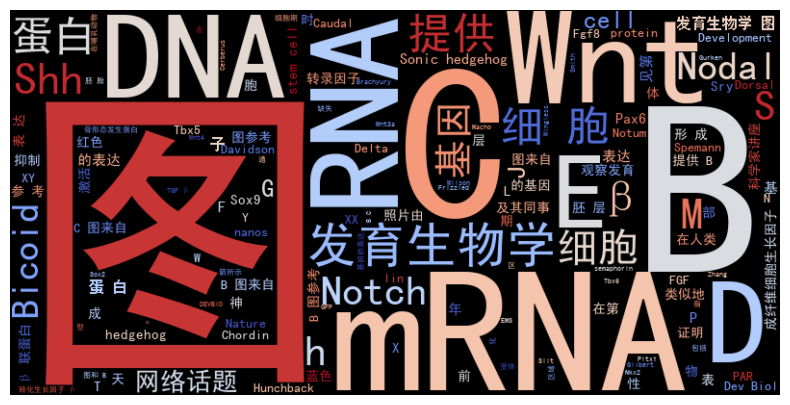

In [9]:
from wordcloud import STOPWORDS
import os

# 自定义无效单词
custom_stopwords = set(STOPWORDS)

# NLP停用词资源
FILE = 'stopwords_cn.txt'
STOPWORDS_FILE = set(map(str.strip, open(FILE).readlines()))
custom_stopwords.update(STOPWORDS_FILE)

custom_stopwords.update(["扩展性问题", "拓展性问题", "见图", "见", "章", "et", "al", "参考", "观察", "希腊语", "绿色"])
custom_stopwords.update(["发育", "生物", "过程", "中", ])
quick_plot(text, font_path, custom_stopwords)


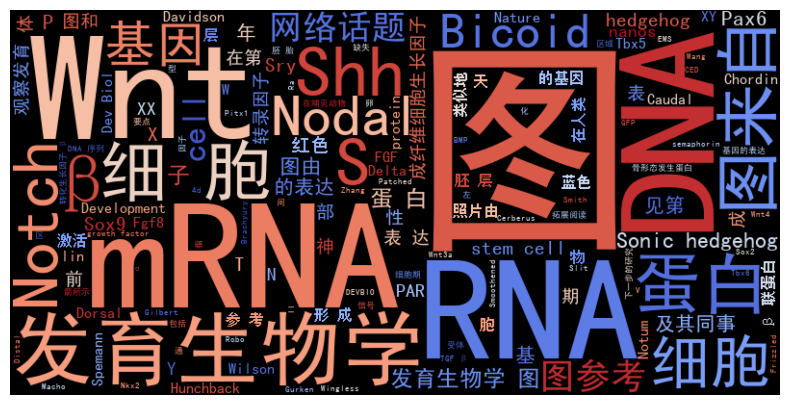

In [12]:
custom_stopwords.update(["扩展性问题", "拓展性问题", "见图", "见", "章", "et", "al", "参考", "观察", "希腊语", "绿色"])
custom_stopwords.update(["发育", "生物", "过程", "中", "提供", "科学家讲座", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M"])
custom_stopwords.update([
    "在", "中", "进程", "过程", "期间", "时", "阶段", "提供", "影响", "作用", "变化", "调控", "参与", "促进",
    "抑制", "表达", "增加", "减少", "活性", "水平", "促进作用", "主要", "首先", "其次", "通过", "或", "为",
    "显示", "示范", "研究", "表明", "揭示", "证明", "依赖", "基于", "相关", "发现", "探讨", "支持", "观察到",
    "说明", "提出", "评估", "分析", "指出", "研究发现", "引起", "结果", "进一步", "对", "作用于", "解释",
    "了解", "表征", "描述", "进一步研究", "发现", "结果表明", "受", "发生", "对...的影响", "定位", "检测",
    "分析", "利用", "确定", "揭示", "调查", "建立", "为基础", "实验结果", "对比", "观察", "验证", "总结",
    "为例", "反映", "聚焦", "确认", "证实", "相关性", "表现出", "显著", "提出假设", "指示", "强调", "体现",
    "表面", "代表", "说明", "系统", "与...相关", "相较于", "具有", "相对", "选择", "依据", "反应", "类似",
    "促进", "影响力", "模拟", "作为", "为例", "展开", "显现", "从而", "接下来", "进行", "不同", "相应",
    "观察结果", "步骤", "中介", "结果显示", "模型", "效应", "对比", "来源于", "先前", "加速", "维持", "平衡",
    "归因", "数据", "方法", "模型中", "显现", "清晰", "提出", "广泛", "已知", "影响了", "观察到的", "研究表明"
])

quick_plot(text, font_path, custom_stopwords)

# jieba分词词云图

In [11]:
import  jieba   #jieba分词包  
from PIL import Image #图片的处理
import matplotlib.pyplot as plt # 主要进行词云绘图
import numpy as np  #进行转换
import  wordcloud  #词云
import pandas as pd #保存词频

/home/liuchangle/miniconda3/envs/biopython/lib/python3.10/site-packages/jieba/_compat.py:18: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [12]:
wordlist = list(jieba.lcut(text)) #进行分词处理，这里使用cut/lcut
wordlist = [word for word in wordlist if len(word)>1]# 该条主要是为了排除一个字符以下的词，没有这条文本将会分出都是单字。

word = " ".join(wordlist)#该条将分好的列表词，转为空格分隔的字符串
word[:1000]

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.564 seconds.
Prefix dict has been built successfully.


'发育 生物学 原书 11 Developmental Biology Eleventh Edition 吉尔伯特 巴雷西 编著 德利 生命科学 名著 发育 生物学 原书 11 Developmental Biology Eleventh Edition 吉尔伯特 巴雷西 编著 石德 Developmental Biology 图字 01 2019 8080 本书 Scott Gilbert Michael Barresi 合著 Developmental Biology 11 中译本 本书 实验 胚胎学 发展史 现代 发育 生物学 做出 介绍 深入 讨论 涉及 脊椎动物 脊椎动物 早期 发育 细胞 分化 胚胎 诱导 体轴 形成 细胞 运动 器官 发生 胚胎 成体 细胞 变态 再生 以及 各种 形式 发育 共生 发育 过程 生物体 环境 互作 进化 变异 机制 人类 生殖 健康 问题 本书 不仅 通俗易懂 生动 语言 形象 系统地 描述 发育 生物学 领域 开拓性 探索 前沿性 未来 研究 方向 提出 进一步 思考 不仅 突出 发育 生物学 技术手段 很多 重要 发育 生物学 问题 相关 领域 科学家 进行 互动 此外 针对 一章 简要 概述 要点 总结 使得 读者 容易 理解 掌握 重要 发育 过程 调控 机制 以及 一章 穿插 一些 拓展 问题 更能 读者 洞悉 发育 生物学 研究 方法 新思路 本书 能为 从事 发育 生物学 研究 教学 科研人员 教师 步入 发育 物学 领域 研究生 以及 关注 环境 生物体 影响 人类 遗传疾病 健康 发育 问题 读者 提供 极好 参考 借鉴 Developmental Biology Eleventh Edition was originally published in English in 2016 This translation is published by arrangement with Oxford University Press China Science Publishing Media Ltd Science Press is solely responsible for this translation from the original work and Oxford University Pr

In [30]:
#停用词处理，使用来自网络的停用词表
stopfile=open(r"stopwords_cn.txt", encoding ="utf-8")
stopword=stopfile.read().split("\n")  
stopfile.close()


In [17]:
# 词云处理
wc = wordcloud.WordCloud(font_path=font_path,  #注意不一定有这个字体自己到 fonts下找个即可。
                          max_font_size=100,
                            width=800,
                            height=400,
                            background_color='black',
                            max_words=150,
                            colormap='coolwarm',
                          stopwords=stopword).generate(word)#传入需画词云图的文本


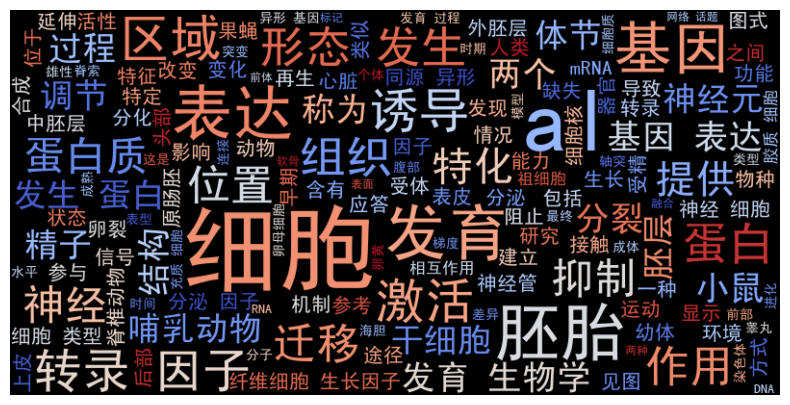

In [20]:
# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.show()

## 词频统计


In [24]:
counts = {} # 新建立一个空的字典
for i in wordlist: # 循环遍历所有的单词
    counts[i] = counts.get(i,0)+1 # 返回word这个键对应的值，只要是出现的单词都默认值为 1，下次如果再遇到就加一
items = list(counts.items()) # 将字典中的值都放入列表中，这个时候应该是一个元组类型的列表
items.sort(key=lambda x:x[1],reverse=True) # lambda关键字表示按照后面指定的方式进行排序，这里表示元组中的第二个元素，也就是单词出现的次数

for i in range(10): # 打印出前十个出现次数最多的单词
    word,count = items[i]
    print("{0:<10}{1:>5}".format(word,count))

细胞         7689
一个         3902
形成         3472
et         3145
al         3122
基因         2833
发育         2715
蛋白         2606
胚胎         2264
表达         2060


# jieba词频共现图

In [3]:
import jieba
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict
import string

plt.rcParams['font.family'] = 'Noto Sans CJK JP'
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK JP']  # 或其他中文字体
plt.rcParams['axes.unicode_minus'] = False

/home/liuchangle/miniconda3/envs/biopython/lib/python3.10/site-packages/jieba/_compat.py:18: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources


In [5]:

#停用词处理，使用来自网络的停用词表
stopfile=open(r"stopwords_cn.txt", encoding ="utf-8")
stopword=stopfile.read().split("\n")  
stopfile.close()

def sequence_word_split(text):
    # 使用 jieba 分词
    sentences = text.split('。')  # 以句号分割句子
    jieba_text = []
    for sentence in sentences:
        jieba_sentence = []
        for word in jieba.lcut(sentence):
            if (word not in stopword) & (len(word) > 1) :   # 去除停用词和单个字符
                word = word.translate(str.maketrans('', '', string.punctuation))  # 去除标点符号
                word = word.translate(str.maketrans('', '', string.digits)) # 去除数字
                
                jieba_sentence.append(word)
        jieba_text.append(jieba_sentence)
    return jieba_text

def build_matrix(jieba_words):
    # 构建共现矩阵
    word_freq = defaultdict(int)
    co_occurrence = defaultdict(lambda: defaultdict(int))
    
    for sentence in jieba_words:
        for i, word in enumerate(sentence):
            word_freq[word] += 1
            for j in range(i + 1, len(sentence)):
                co_occurrence[word][sentence[j]] += 1
                co_occurrence[sentence[j]][word] += 1
    
    # 转换为矩阵形式
    vocab = list(word_freq.keys())
    vocab_index = {word: i for i, word in enumerate(vocab)}
    matrix = np.zeros((len(vocab), len(vocab)))
    
    for word, neighbors in co_occurrence.items():
        for neighbor, freq in neighbors.items():
            i, j = vocab_index[word], vocab_index[neighbor]
            matrix[i][j] = freq
    
    return matrix, vocab

In [6]:
# 分词
jieba_text = sequence_word_split(text)

# 构建共现矩阵
matrix, vocab = build_matrix(jieba_text)


Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.563 seconds.
Prefix dict has been built successfully.


In [7]:
# 画图
G = nx.Graph()

for i, word in enumerate(vocab):
    G.add_node(word)

# 过滤低质量节点
EDGE_THRESHOLD = 500
word_idx, neighbors_idx = np.where(matrix > EDGE_THRESHOLD)

for i in range(len(word_idx)):
    G.add_edge(vocab[word_idx[i]], 
               vocab[neighbors_idx[i]], 
               weight=matrix[word_idx[i], neighbors_idx[i]])

# 移除没有边的孤立节点
isolated_nodes = list(nx.isolates(G))
G.remove_nodes_from(isolated_nodes)

# 关键节点
core_nodes = [n for n, deg in G.degree() if deg > 5]  # 自定义边的数量，当边的数量大于5时，认为是核心节点


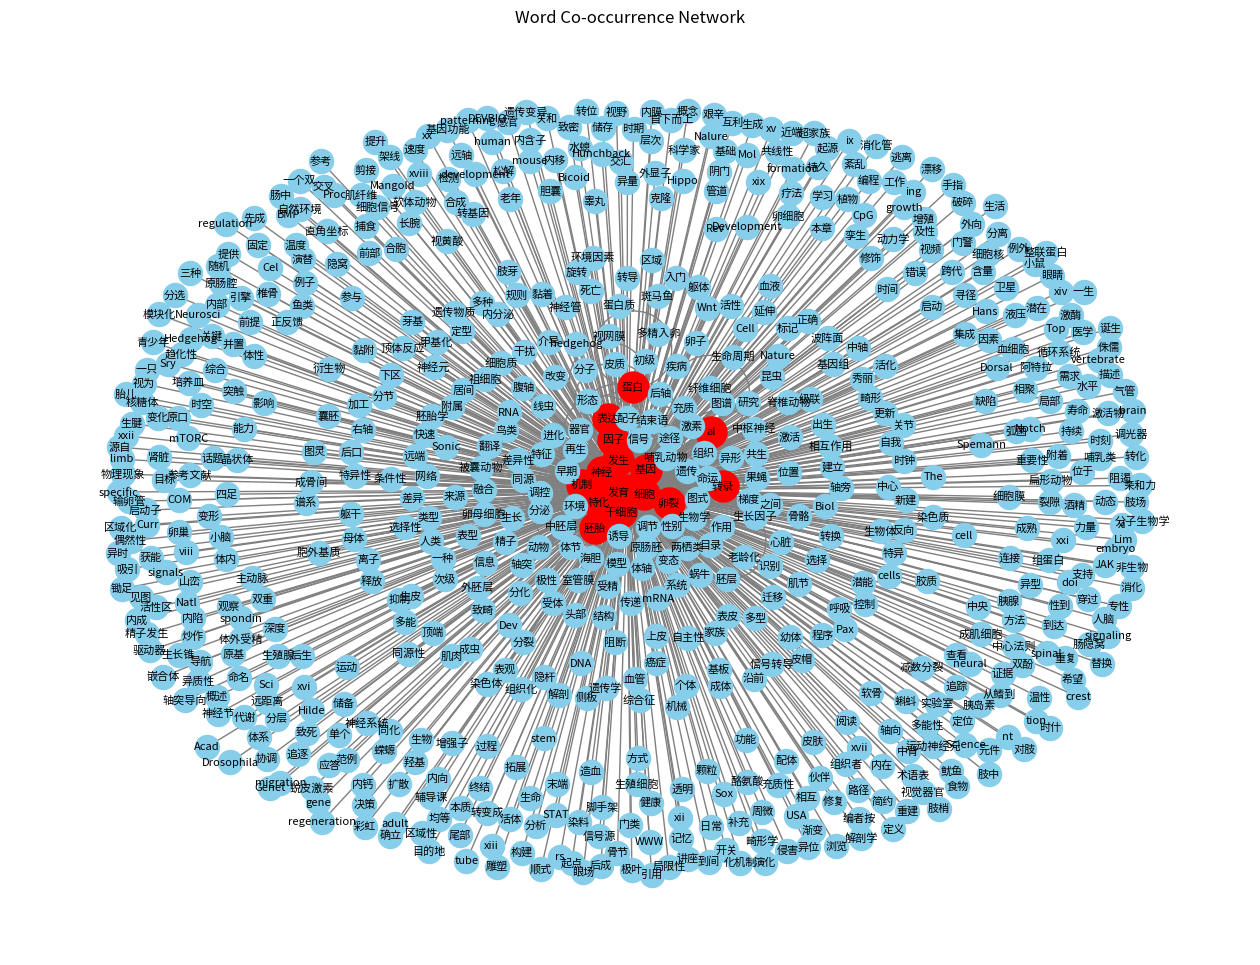

In [8]:
pos = nx.spring_layout(G, k=4, seed=42)
# pos = nx.random_layout(G, seed=42)
# pos = nx.circular_layout(G)
# pos = nx.shell_layout(G)
# pos=nx.spectral_layout(G)          # 利用图拉普拉斯特征向量生成节点布局

# DeepSeek Recomdation

# pos = nx.kamada_kawai_layout(G)  # 使用Kamada-Kawai布局（适合中小型图）
# pos = nx.multipartite_layout(G, subset_key="subset")  # 使用multipartite_layout布局

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, 
                       node_color='red', node_size=500)  # 核心节点
nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes())-set(core_nodes),
                        node_color='skyblue', node_size=300) # 非核心节点
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Word Co-occurrence Network')
plt.show()


# pos = nx.spring_layout(G)
# weights = [G[u][v]['weight'] for u, v in G.edges()]
# nx.draw(G, pos, with_labels=True,  node_color="skyblue", font_color="black", width=weights)
# plt.show()

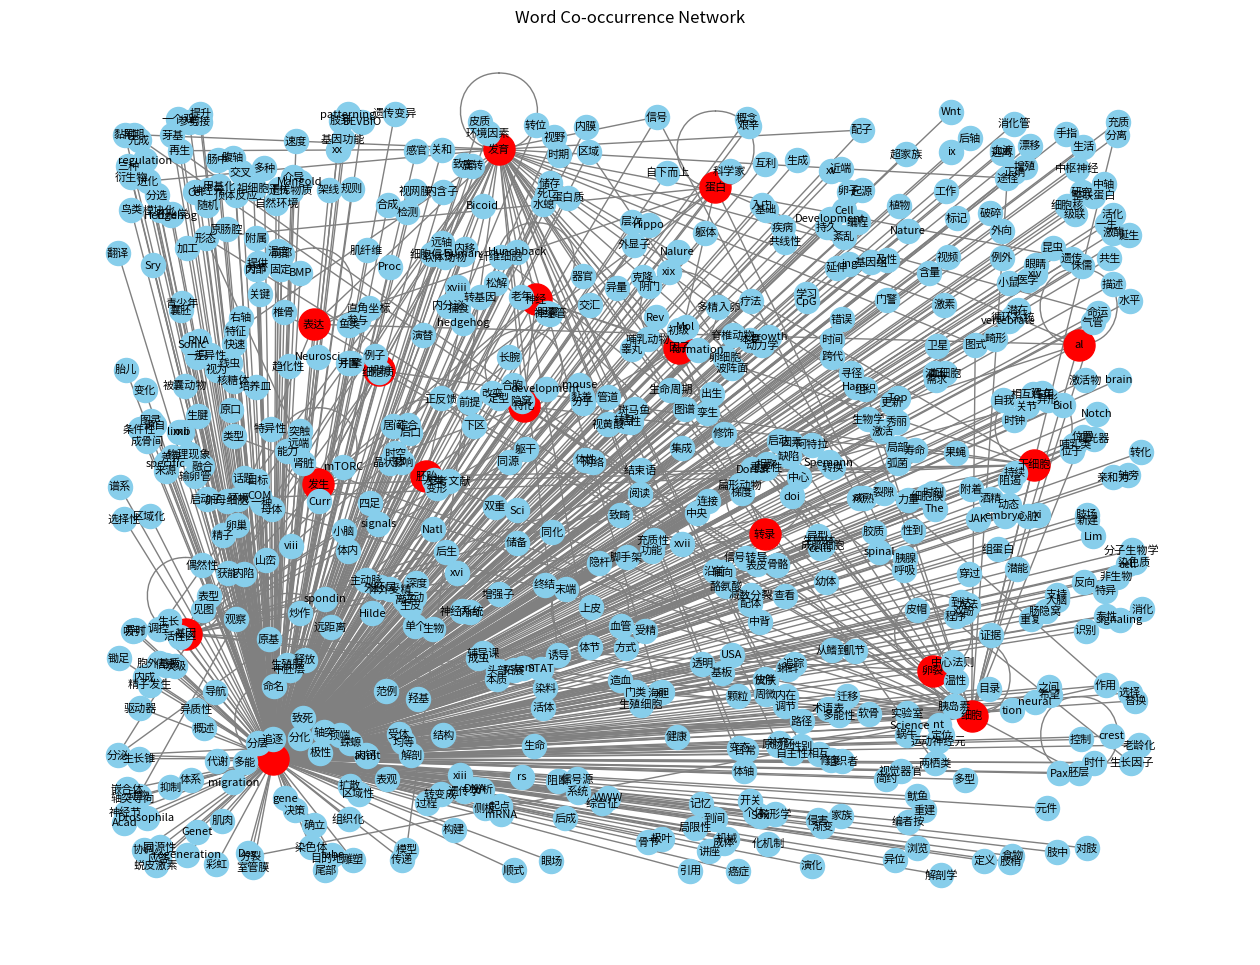

In [9]:
pos = nx.random_layout(G, seed=42)

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, 
                       node_color='red', node_size=500)  # 核心节点
nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes())-set(core_nodes),
                        node_color='skyblue', node_size=300) # 非核心节点
nx.draw_networkx_edges(G, pos, edge_color='gray', )
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Word Co-occurrence Network')
plt.show()

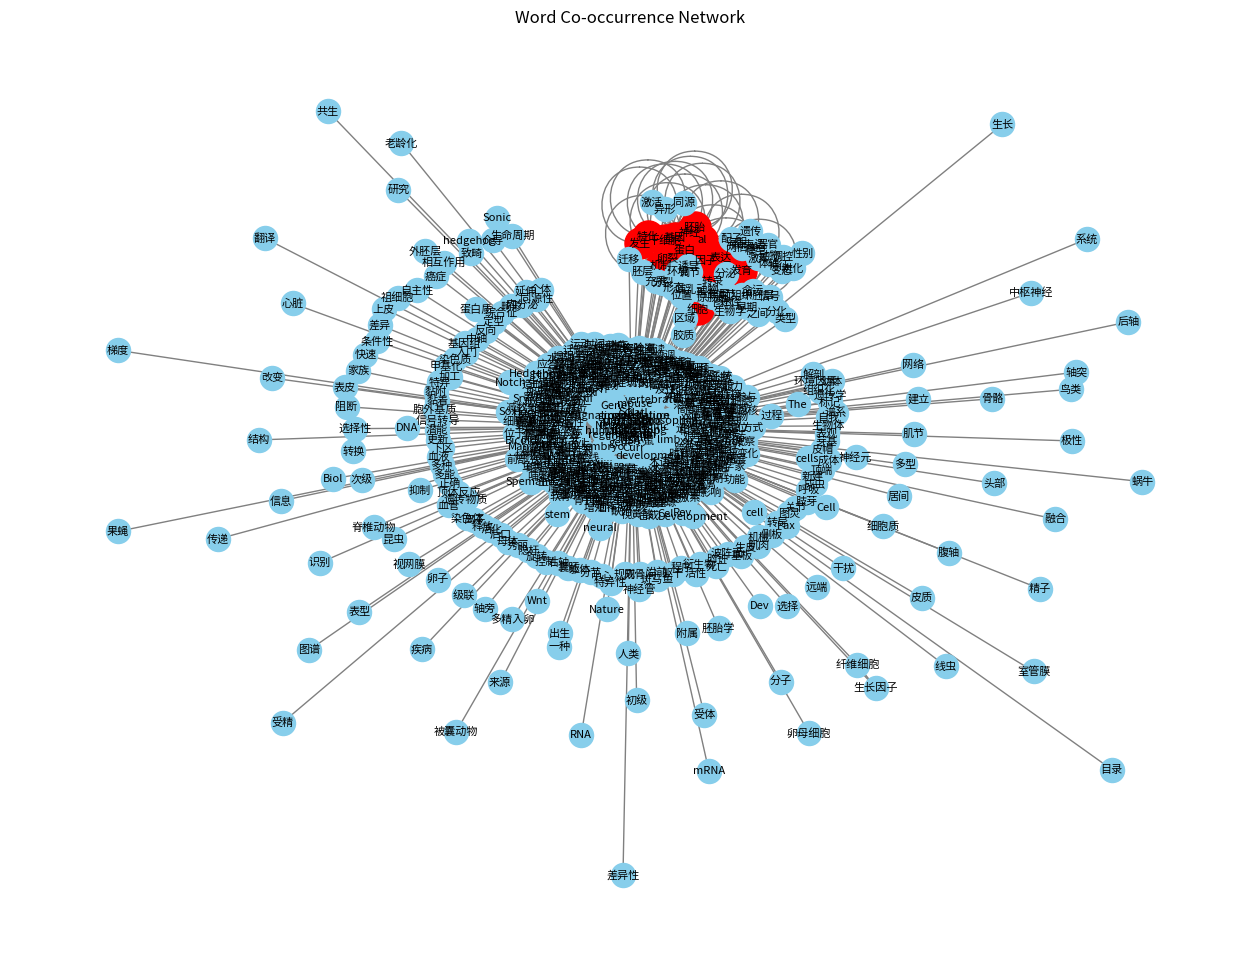

In [12]:
pos = nx.kamada_kawai_layout(G, scale=2, )

plt.figure(figsize=(16, 12))
nx.draw_networkx_nodes(G, pos, nodelist=core_nodes, 
                       node_color='red', node_size=500)  # 核心节点
nx.draw_networkx_nodes(G, pos, nodelist=set(G.nodes())-set(core_nodes),
                        node_color='skyblue', node_size=300) # 非核心节点
nx.draw_networkx_edges(G, pos, edge_color='gray', )
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')
plt.axis('off')
plt.title('Word Co-occurrence Network')
plt.show()

In [29]:
nx

<module 'networkx' from '/home/liuchangle/miniconda3/envs/biopython/lib/python3.10/site-packages/networkx/__init__.py'>

# SpaCy关系提取
基于SpaCy和NetworkX的命名实体识别、关系抽取、构建关系网络

`python -m spacy download zh_core_web_md`

v1：仅记录相邻实体


In [3]:
import spacy
import networkx as nx

In [ ]:
def extract_relations(text, model='zh_core_web_md'):
    nlp = spacy.load(model)
    doc = nlp(text)
    # 简单示例：抽取句子中的实体对
    relations = []
    for sent in doc.sents:
        entities = [(ent.text, ent.label_) for ent in sent.ents]
        # 根据业务场景或规则识别实体间关系
        # 这里仅记录相邻实体对
        for i in range(len(entities) - 1):
            relations.append((entities[i][0], entities[i+1][0]))
    return relations

In [ ]:
def build_network(relations):
    G = nx.Graph()
    for src, dst in relations:
        G.add_node(src)
        G.add_node(dst)
        if G.has_edge(src, dst):
            G[src][dst]['weight'] += 1
        else:
            G.add_edge(src, dst, weight=1)
    return G

def plot_network(G):
    pos = nx.spring_layout(G)
    weights = [G[u][v]['weight'] for u,v in G.edges()]
    nx.draw(G, pos, with_labels=True, width=weights, node_color='lightblue')